In [2]:
library(xgboost)
library(readr)
library(stringr)
library(caret)
library(car)



Loading required package: ggplot2

Loading required package: lattice

Loading required package: carData



In [3]:
library(readxl)
DS_Assignment_Part_1_data_set <- read_excel("DS - Assignment Part 1 data set.xlsx")
df <- DS_Assignment_Part_1_data_set
rm(DS_Assignment_Part_1_data_set)

df$`Number of convenience stores` <- as.factor(df$`Number of convenience stores`) 
df$`Number of bedrooms` <- as.factor(df$`Number of bedrooms`)

library(tidyverse)

str_extract_all(df$`Transaction date`, '\\.\\d+',simplify = TRUE) |>
                                        str_replace_all("^$","0") |>
                                        as.numeric()              |>
                                        magrittr::multiply_by(12) |>
                                        magrittr::add(1)          |>
                                        round()                   -> 
                                        Transaction_Month

df$Transaction_Month <- Transaction_Month



df$`Transaction date`     |>
str_remove_all('\\.\\d+') |>
as.numeric()              -> df$`Transaction date`

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
✖ dplyr::recode() masks car::recode()
✖ dplyr::slice()  masks xgboost::slice()
✖ purrr::some()   masks car::some()


In [6]:
library(xgboost)
head(train)

Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Transaction_Month
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
2012,32.0,84.87882,10,24.98298,121.5402,1,575,37.9,12
2012,19.5,306.59470,9,24.98034,121.5395,2,1240,42.2,12
2013,13.3,561.98450,5,24.98746,121.5439,2,875,54.8,7
2012,5.0,390.56840,5,24.97937,121.5425,1,491,43.1,11
2012,7.1,2175.03000,3,24.96305,121.5125,3,828,32.1,9
2012,34.5,623.47310,7,24.97933,121.5364,3,1115,40.3,9


In [5]:
set.seed(412)
train.index <- caret::createDataPartition(df$`Number of convenience stores`, p = .7, list = FALSE)
train <- df[ train.index,]
test  <- df[-train.index,]


In [15]:
train |> apply(2,as.numeric) -> train
test |> apply(2,as.numeric) -> test

In [42]:
xgb <- xgboost(data = as.matrix((train[,-9])), 
    label=as.vector(train[,9]),
    nthread = 6,
    nrounds=40,
    max_depth=20,
    
    )

[1]	train-rmse:28.180161 
[2]	train-rmse:20.447372 
[3]	train-rmse:15.084158 
[4]	train-rmse:11.330749 
[5]	train-rmse:8.684250 
[6]	train-rmse:6.739746 
[7]	train-rmse:5.274966 
[8]	train-rmse:4.122145 
[9]	train-rmse:3.276374 
[10]	train-rmse:2.627575 
[11]	train-rmse:2.129396 
[12]	train-rmse:1.744803 
[13]	train-rmse:1.401116 
[14]	train-rmse:1.123968 
[15]	train-rmse:0.917433 
[16]	train-rmse:0.754427 
[17]	train-rmse:0.630763 
[18]	train-rmse:0.521174 
[19]	train-rmse:0.433379 
[20]	train-rmse:0.359400 
[21]	train-rmse:0.298864 
[22]	train-rmse:0.251143 
[23]	train-rmse:0.209584 
[24]	train-rmse:0.175959 
[25]	train-rmse:0.147573 
[26]	train-rmse:0.122616 
[27]	train-rmse:0.102892 
[28]	train-rmse:0.086581 
[29]	train-rmse:0.073108 
[30]	train-rmse:0.061794 
[31]	train-rmse:0.052420 
[32]	train-rmse:0.044313 
[33]	train-rmse:0.037477 
[34]	train-rmse:0.031734 
[35]	train-rmse:0.026866 
[36]	train-rmse:0.022796 
[37]	train-rmse:0.019367 
[38]	train-rmse:0.016452 
[39]	train-rmse:0

In [43]:
pred <- predict(xgb, as.matrix(test[,-9])) 

In [44]:
percent_error <- function(resid,actual,title)
    {
    
    percent <- resid/actual*100
    
    percent |> Filter(\(x) x> -100 & x < 100, x=_) |> hist(xlab = "Percent deviation", main = title)
    
    percent |> abs() |> mean() -> error 
    
    library(glue)
    mtext(glue("The mean absolute {title} in percentage is { round(error,digits=3) }"), side =3)
    
    return (error)
    
    
    }

rmse <- function(resid,title){
    
    resid^2 |> mean() |> sqrt() -> rms
    hist(resid, xlab= "Residual values")
    
    library(glue)
    mtext(glue("The Root mean square error of {title}  is { round(rms,digits=3) }"), side =3)
    return (rms)
}

[1] 13.94548

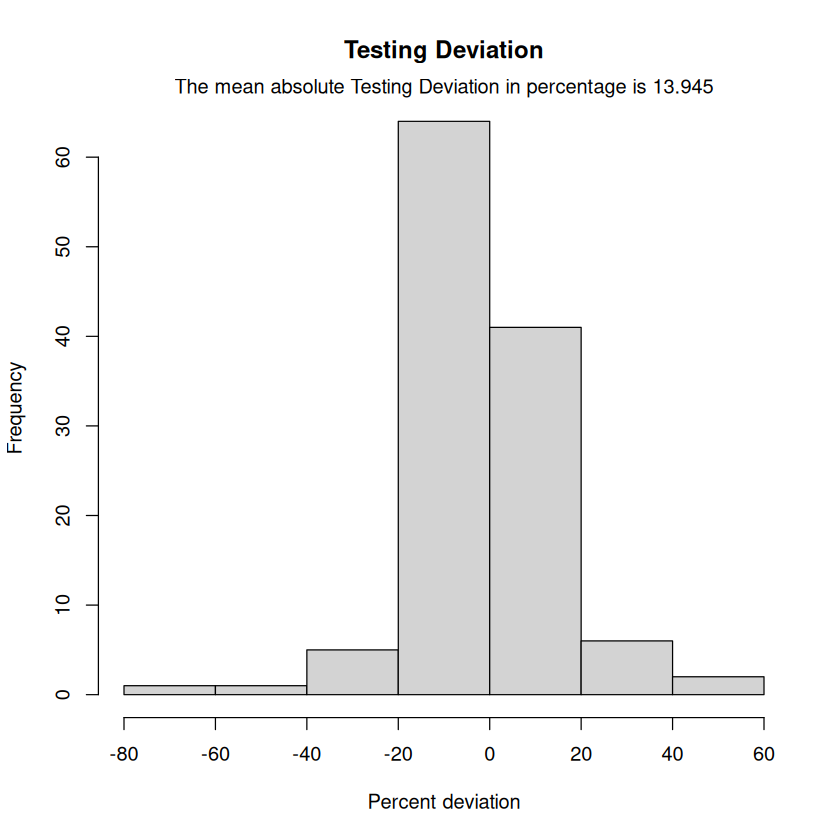

In [45]:
percent_error(pred-test[,9],test[,9],"Testing Deviation")

[1] 9.810591

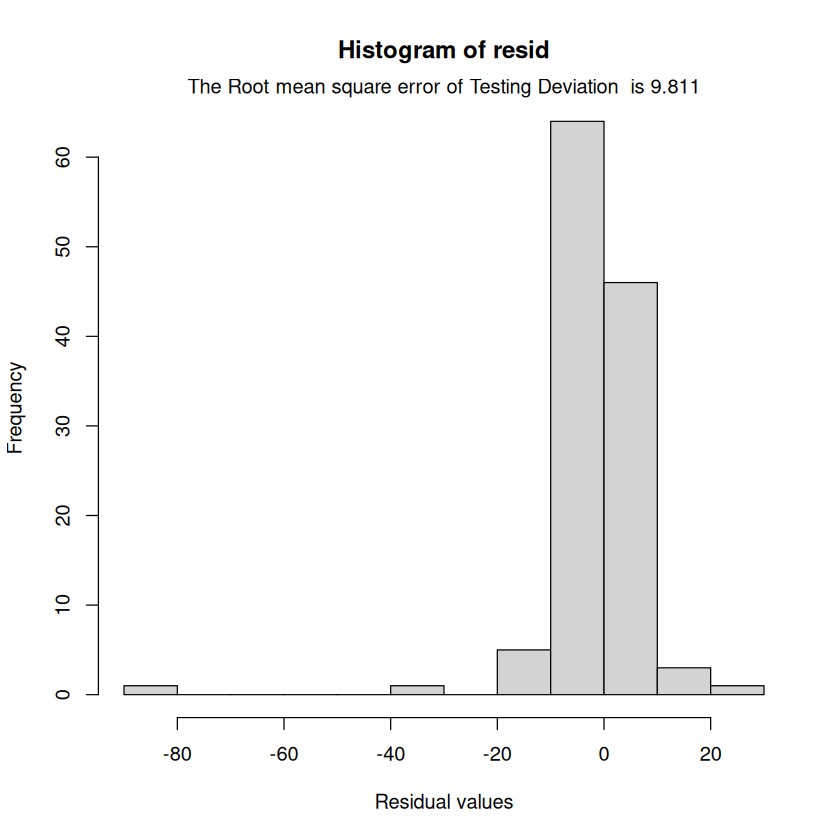

In [46]:
rmse(pred-test[,9],"Testing Deviation")